# Simple Linear Regression using sklearn Library

## Importing the libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [4]:
df= pd.read_csv('petrol_consumption.csv')

In [5]:
df.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


# Splitting the dataset into the Training set and Test set

In [6]:
X = df[['Petrol_tax','Average_income','Population_Driver_licence(%)']]#'Petrol_tax','Paved_Highways'
y = df['Petrol_Consumption']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [6]:
X_train.head(10)

,Petrol_tax,Average_income,Population_Driver_licence(%)
44,6.00,5215,0.672
35,6.58,3802,0.629
33,7.50,3357,0.547
38,8.50,3635,0.663
36,5.00,4045,0.566
0,9.00,3571,0.525
23,9.00,4258,0.517
3,7.50,4870,0.529
18,7.00,4716,0.724
12,7.00,4817,0.574


## Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
r_squared= r2_score(y_test, y_pred)

In [12]:
r_squared

0.4318504552134186

In [18]:
adjusted_r_squared_test = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [15]:
adjusted_r_squared

0.38171961302636725

In [17]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check

,Actual,Predicted
47,524,578.763625
32,577,662.434863
7,467,483.476366
29,534,470.676895
30,571,558.320749
1,524,556.748062
41,699,625.382635
19,640,711.861018
22,464,409.302537
24,460,505.088268


## Visualising the  results

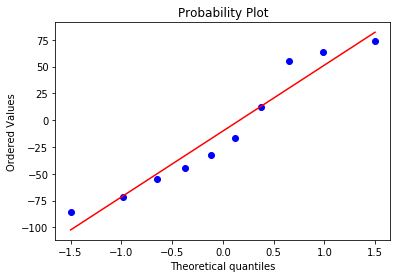

In [28]:
from scipy import stats
stats.probplot(y_test-y_pred, plot=plt)
plt.show()

# Model evaluation metrics- Trianing Data

In [24]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))

Mean Absolute Error: 49.38412035712645
Mean Squared Error: 4281.66277077009
Root Mean Squared Error: 65.43441579757621


In [25]:
def mean_absolute_percentage_error(y_true, y_pred1): 
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

In [26]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred1))

Mean Absolute percentage error: 8.244782959878714


# Model evaluation metrics- Test Data

In [20]:
# Model evaluation metrics - Regression problems


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.06893871665558
Mean Squared Error: 3142.09424248771
Root Mean Squared Error: 56.05438646963955


In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute percentage error: 9.246450233883316


# Training the Simple Linear Regression model on the Training set
# Without Intercept

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r_squared= r2_score(y_test, y_pred)

In [15]:
r_squared

0.2691778872894103

In [16]:
adjusted_r_squared_test = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [17]:
adjusted_r_squared_test

-0.09623316906588464

## Visualising the  results

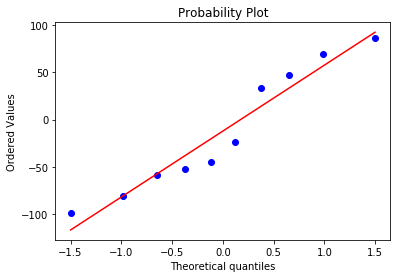

In [18]:
from scipy import stats
stats.probplot(y_test-y_pred, plot=plt)
plt.show()

# Model evaluation metrics- Trianing Data

In [19]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))

Mean Absolute Error: 51.158542022005214
Mean Squared Error: 4436.433635464877
Root Mean Squared Error: 66.60655850188385


In [20]:
def mean_absolute_percentage_error(y_true, y_pred1): 
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

In [21]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred1))

Mean Absolute percentage error: 8.605922681158141
